In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [118]:
data=pd.read_csv("churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [119]:
data.shape

(7043, 21)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [121]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [122]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [123]:
missing_cols=[col for col in data.columns
                  if data[col].isnull().sum()]
missing_cols

[]

In [124]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

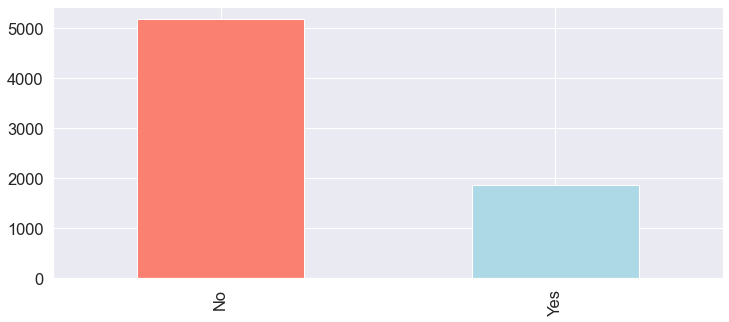

In [125]:
data.Churn.value_counts().plot.bar(color=["salmon","lightblue"],figsize=(12,5));

*** To see the percentage of customers that are leaving

In [66]:
numRetained=data[data["Churn"]=="No"].shape[0]
numChurned=data[data["Churn"]=="Yes"].shape[0]
numRetained,numChurned

(5174, 1869)

In [67]:
# print the percentage of customers that stayed
print(numRetained/(numRetained+numChurned)* 100,"% of customers stayed in the comapny")

73.4630129206304 % of customers stayed in the comapny


In [68]:
print(numChurned/(numRetained+numChurned)* 100,"% of customers left the company")

26.536987079369588 % of customers left the company


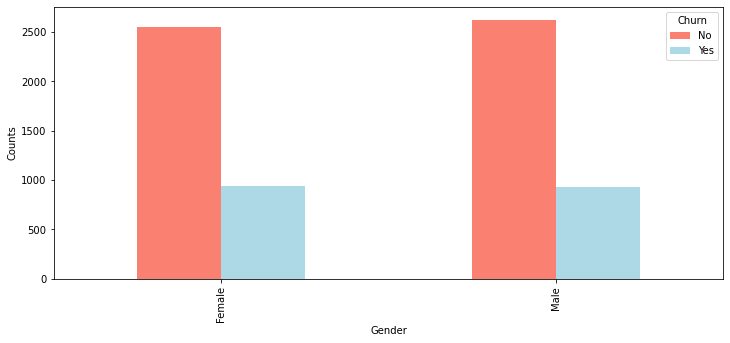

In [69]:
pd.crosstab(data.gender,data.Churn).plot(kind="bar",color=["salmon","lightblue"],figsize=(12,5))
plt.xlabel("Gender");
plt.ylabel("Counts");

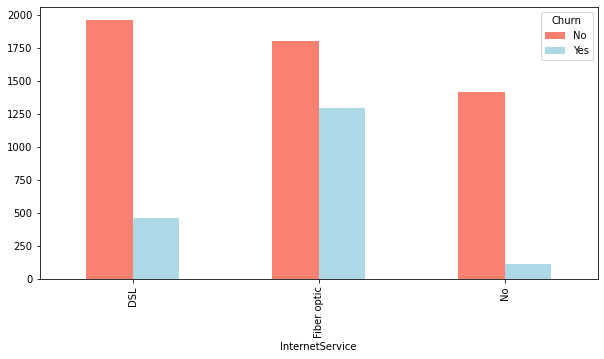

In [70]:
pd.crosstab(data.InternetService,data.Churn).plot.bar(color=["salmon","lightblue"],figsize=(10,5));

* To Visualize Numeric data

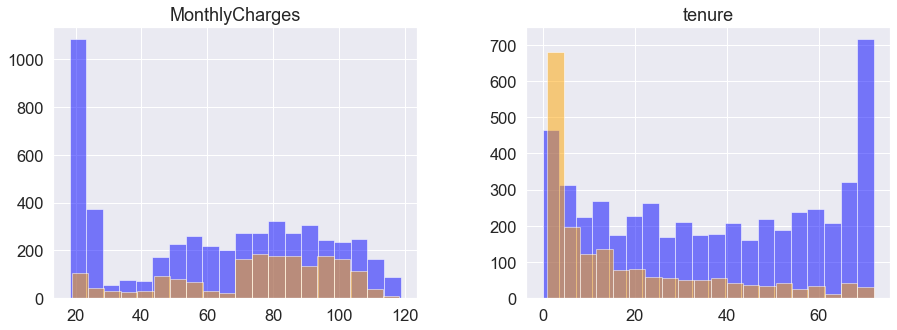

In [116]:
numericFeatures=["tenure","MonthlyCharges"]
fig,ax=plt.subplots(1,2,figsize=(15,5))
data[data.Churn == "No"][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax);
data[data.Churn == "Yes"][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax);

* To remove unnecessary columns

In [72]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
# Removing the customerID column
cleanData=data.drop("customerID",axis=1)

### Convert all the non-numeric columns to numeric

In [79]:
for column in cleanData.columns:
  if cleanData[column].dtype == np.number:
    continue
  cleanData[column] = LabelEncoder().fit_transform(cleanData[column])

In [80]:
cleanData.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [82]:
cleanData.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


### Scale the data

In [83]:
X=cleanData.drop("Churn",axis=1)
y=cleanData.Churn
X=StandardScaler().fit_transform(X)

In [84]:
# Split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Create and Train the model

In [87]:
model = LogisticRegression()
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [88]:
y_preds=model.predict(X_test)
y_preds

array([1, 0, 0, ..., 0, 0, 0])

In [89]:
y_preds.shape

(1409,)

In [91]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



 ### Tuning models with with [`RandomizedSearchCV`]

In [94]:
from sklearn.model_selection import RandomizedSearchCV
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}


In [95]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


In [96]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [97]:
rs_log_reg.score(X_test, y_test)

0.8176011355571328

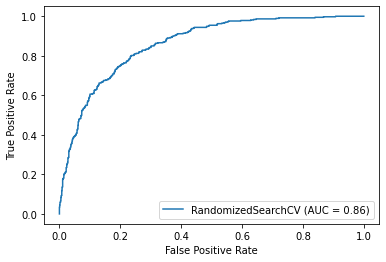

In [99]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
from plot_roc_curve(rs_log_reg, X_test, y_test);

In [101]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[940  96]
 [163 210]]


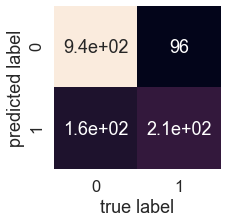

In [103]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [104]:
clf = LogisticRegression(C=11.288378916846883,
                         solver="liblinear")

In [105]:
clf.fit(X_train,y_train)

LogisticRegression(C=11.288378916846883, solver='liblinear')

In [106]:
clf.coef_

array([[-0.02511811,  0.06807436,  0.03228082, -0.08587501, -0.82383415,
        -0.29982063,  0.08073845,  0.18989265, -0.24025235, -0.12117221,
        -0.06047064, -0.20716003, -0.00386601,  0.04010668, -0.61763322,
         0.16884351,  0.06790665,  0.80367428,  0.11251899]])

In [109]:
features_dict = dict(zip(data.columns, list(clf.coef_[0])))
features_dict

{'customerID': -0.025118108478344267,
 'gender': 0.06807436379495664,
 'SeniorCitizen': 0.03228082056331428,
 'Partner': -0.0858750088761863,
 'Dependents': -0.8238341548411329,
 'tenure': -0.2998206261644728,
 'PhoneService': 0.08073844711357606,
 'MultipleLines': 0.18989264616917553,
 'InternetService': -0.2402523504483409,
 'OnlineSecurity': -0.12117221192582064,
 'OnlineBackup': -0.060470636021529856,
 'DeviceProtection': -0.20716002708184766,
 'TechSupport': -0.00386600519803388,
 'StreamingTV': 0.04010668025738513,
 'StreamingMovies': -0.617633221274471,
 'Contract': 0.16884350982572893,
 'PaperlessBilling': 0.0679066492601109,
 'PaymentMethod': 0.8036742794739397,
 'MonthlyCharges': 0.11251899271412515}

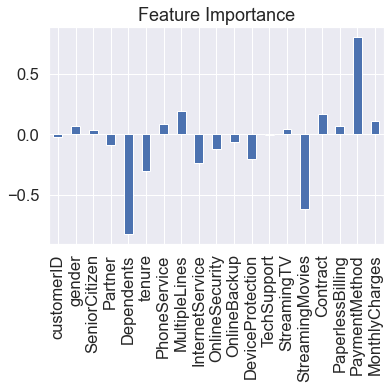

In [110]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [113]:
pd.crosstab(data["gender"], data["Churn"])

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [114]:
# Contrast slope (positive coefficient) with target
pd.crosstab(data["tenure"], data["Churn"])

Churn,No,Yes
tenure,,
0,11,0
1,233,380
2,115,123
3,106,94
4,93,83
...,...,...
68,91,9
69,87,8
70,108,11
